In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# from dune_client.client import DuneClient
# dune = DuneClient("9vMXyjOypBW6hY4s1uLH2riOfgfnuXJ8")

# query_result = dune.get_latest_result(5985832)

In [15]:
# # Fetch the latest query result
# query_result = dune.get_latest_result(5985832)

# # Convert to DataFrame
# df = pd.DataFrame(query_result.result.rows)

# # Save to CSV
# df.to_csv("dune_good_vs_bad_trader.csv", index=False)

   active_weeks target_variable  total_volume trader_activity_status  \
0             1    🔴 Bad Trader    412.163147      🐣 Occasional User   
1             1    🔴 Bad Trader    280.900336         🐤 Regular User   
2             1    🔴 Bad Trader   5606.158793      🐣 Occasional User   
3             1    🔴 Bad Trader    591.958560         🐤 Regular User   
4             1    🔴 Bad Trader      3.027157         🐤 Regular User   

    trader_volume_status trader_weekly_frequency_status  tx_count_365d  \
0  🐟 Middle Value Trader                    🐣 Unserious              1   
1  🐟 Middle Value Trader                    🐣 Unserious              2   
2  🐟 Middle Value Trader                    🐣 Unserious              1   
3  🐟 Middle Value Trader                    🐣 Unserious              2   
4     🦐 Low Value Trader                    🐣 Unserious              2   

                                       wallet  
0  0x46f884a01723cd148660e81722f25dd45a2de5c8  
1  0x1be0ada3e6ed0801732a3

In [19]:
df = pd.read_csv('data/dune_good_vs_bad_trader.csv')

In [21]:
df

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,🔴 Bad Trader,4.121631e+02,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,1,0x46f884a01723cd148660e81722f25dd45a2de5c8
1,1,🔴 Bad Trader,2.809003e+02,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,2,0x1be0ada3e6ed0801732a31e64e784c6c8fa4078f
2,1,🔴 Bad Trader,5.606159e+03,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,1,0xaa7d22c5cbfa678119745a34721051de2f697766
3,1,🔴 Bad Trader,5.919586e+02,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,2,0xa40e92329c017b569128e371eb0c3d58fc03a20a
4,1,🔴 Bad Trader,3.027157e+00,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2,0x19a42013f9c1a225ec365bee1119e85d2086f083
...,...,...,...,...,...,...,...,...
9995,11,🟢 Good Trader,1.166950e+06,🐦 Frequent User,🐳 High Value Trader,🐦 OG,17,0x6adc19da5252941f0417f5462114f360a839d6f1
9996,11,🟢 Good Trader,4.882025e+04,🐦 Frequent User,🐟 Middle Value Trader,🐦 OG,32,0xedf4edfcee91116a7755647e66781a61a65e52c2
9997,18,🟢 Good Trader,4.102700e+04,🐦 Frequent User,🐟 Middle Value Trader,🐦 OG,88,0x368e43a9fb4974b3b2e3437e5d1b2a92fbb7f93f
9998,8,🟢 Good Trader,6.839622e+02,🐤 Regular User,🐟 Middle Value Trader,🐦 OG,9,0x6c2152c1918c3f34cb7df0ac19acf360e6fc0523


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   active_weeks                    10000 non-null  int64  
 1   target_variable                 10000 non-null  object 
 2   total_volume                    10000 non-null  float64
 3   trader_activity_status          10000 non-null  object 
 4   trader_volume_status            10000 non-null  object 
 5   trader_weekly_frequency_status  10000 non-null  object 
 6   tx_count_365d                   10000 non-null  int64  
 7   wallet                          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [21]:
strings = list(df.dtypes[df.dtypes =='object'].index)
strings

['target_variable',
 'trader_activity_status',
 'trader_volume_status',
 'trader_weekly_frequency_status',
 'wallet']

#### Exploratory data analysis

In [25]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print() 

active_weeks
[1 2 3 5 9]
53

target_variable
['🔴_bad_trader' '🟢_good_trader']
2

total_volume
[4.12163147e+02 2.80900336e+02 5.60615879e+03 5.91958560e+02
 3.02715742e+00]
9553

trader_activity_status
['🐣_occasional_user' '🐤_regular_user' '🐦_frequent_user']
3

trader_volume_status
['🐟_middle_value_trader' '🦐_low_value_trader' '🐳_high_value_trader']
3

trader_weekly_frequency_status
['🐣_unserious' '🐤_just_there' '🐦_og']
3

tx_count_365d
[1 2 3 4 5]
442

wallet
['0x46f884a01723cd148660e81722f25dd45a2de5c8'
 '0x1be0ada3e6ed0801732a31e64e784c6c8fa4078f'
 '0xaa7d22c5cbfa678119745a34721051de2f697766'
 '0xa40e92329c017b569128e371eb0c3d58fc03a20a'
 '0x19a42013f9c1a225ec365bee1119e85d2086f083']
10000



In [34]:
# Make a copy of the df to avoid modifying the original
df_clean = df.copy()

# Clean up the categorical labels
df_clean['target_variable'] = df_clean['target_variable'].str.replace(r'^[🔴🟢]_','', regex=True)
df_clean['trader_activity_status'] = df_clean['trader_activity_status'].str.replace(r'^[🐣🐤🐦]_','', regex=True)
df_clean['trader_volume_status'] = df_clean['trader_volume_status'].str.replace(r'^[🦐🐳🐟]_','', regex=True)
df_clean['trader_weekly_frequency_status'] = df_clean['trader_weekly_frequency_status'].str.replace(r'^[🐣🐤🐦]_','', regex=True)

In [36]:
df_clean

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,bad_trader,4.121631e+02,occasional_user,middle_value_trader,unserious,1,0x46f884a01723cd148660e81722f25dd45a2de5c8
1,1,bad_trader,2.809003e+02,regular_user,middle_value_trader,unserious,2,0x1be0ada3e6ed0801732a31e64e784c6c8fa4078f
2,1,bad_trader,5.606159e+03,occasional_user,middle_value_trader,unserious,1,0xaa7d22c5cbfa678119745a34721051de2f697766
3,1,bad_trader,5.919586e+02,regular_user,middle_value_trader,unserious,2,0xa40e92329c017b569128e371eb0c3d58fc03a20a
4,1,bad_trader,3.027157e+00,regular_user,low_value_trader,unserious,2,0x19a42013f9c1a225ec365bee1119e85d2086f083
...,...,...,...,...,...,...,...,...
9995,11,good_trader,1.166950e+06,frequent_user,high_value_trader,og,17,0x6adc19da5252941f0417f5462114f360a839d6f1
9996,11,good_trader,4.882025e+04,frequent_user,middle_value_trader,og,32,0xedf4edfcee91116a7755647e66781a61a65e52c2
9997,18,good_trader,4.102700e+04,frequent_user,middle_value_trader,og,88,0x368e43a9fb4974b3b2e3437e5d1b2a92fbb7f93f
9998,8,good_trader,6.839622e+02,regular_user,middle_value_trader,og,9,0x6c2152c1918c3f34cb7df0ac19acf360e6fc0523


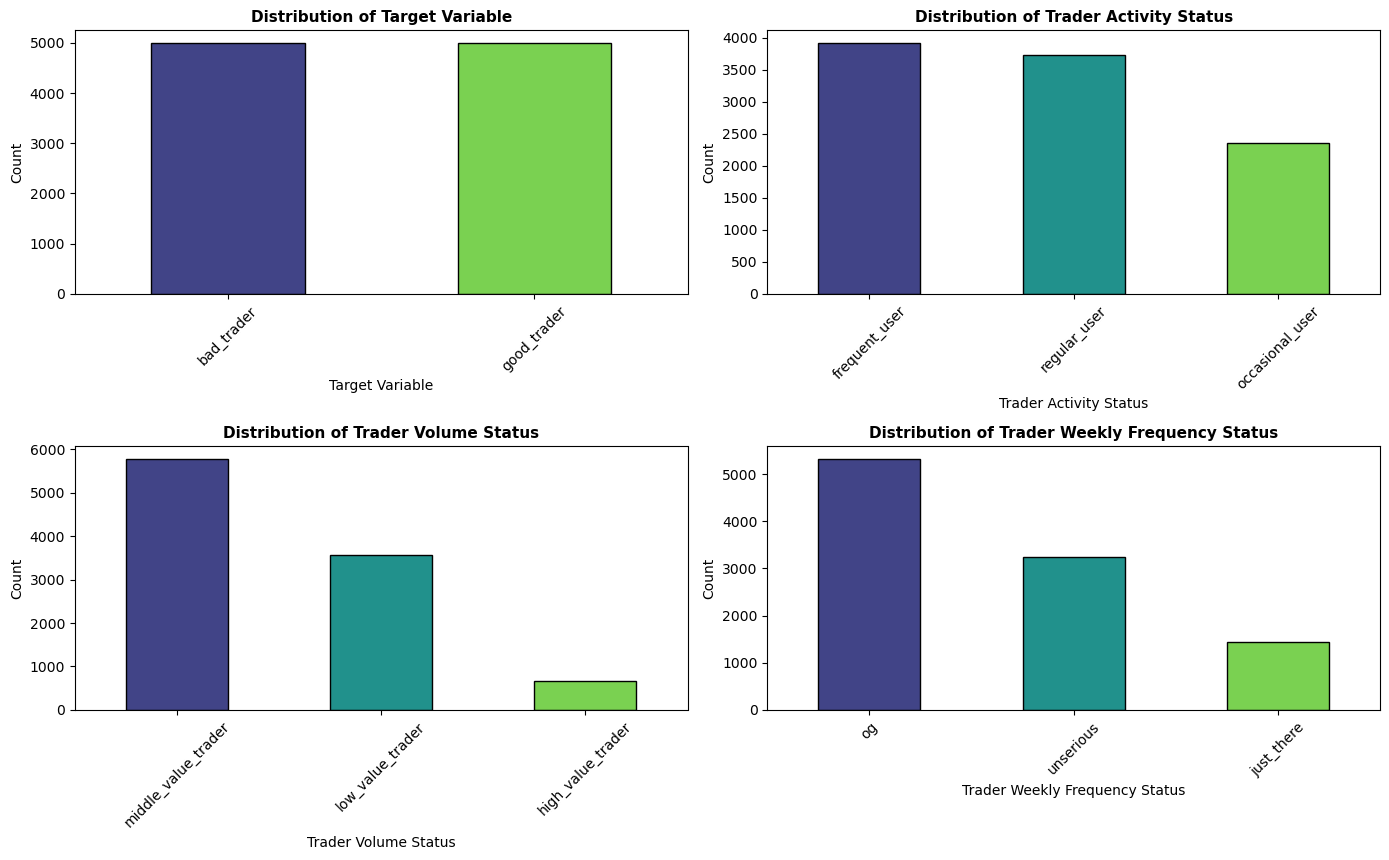

In [50]:
# Define columns to visualize
cols = [
    'target_variable',
    'trader_activity_status',
    'trader_volume_status',
    'trader_weekly_frequency_status'
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Use the viridis color map
colors = plt.cm.viridis(range(len(cols)))

# Plot each bar chart
for i, col in enumerate(cols):
    df_clean[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        color=plt.cm.viridis(np.linspace(0.2, 0.8, df_clean[col].nunique())),
        edgecolor='black'
    )
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

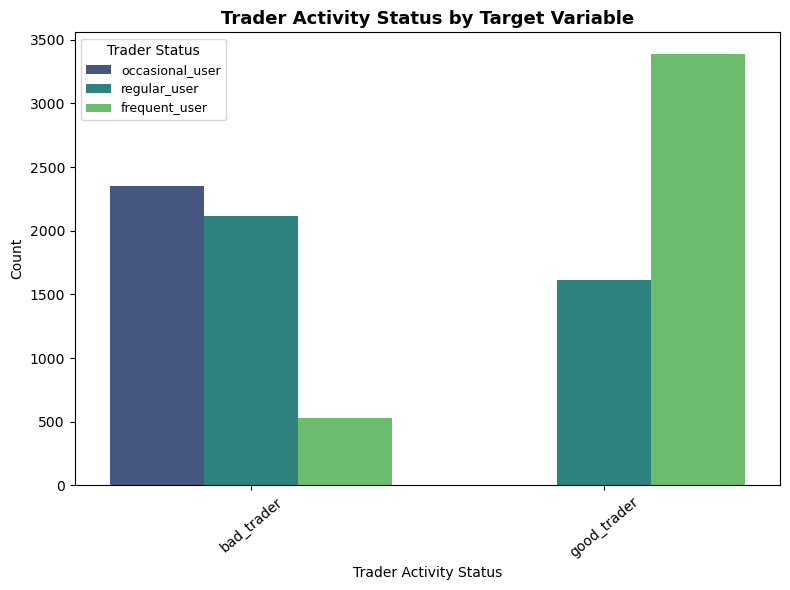

In [84]:
# Plot grouped bar chart
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_clean,
    x='target_variable',
    hue='trader_activity_status',
    palette='viridis'
)

# Customize look
plt.title('Trader Activity Status by Target Variable', fontsize=13, fontweight='bold')
plt.xlabel('Trader Activity Status')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.grid(False)
plt.legend(title='Trader Status', title_fontsize=10, fontsize=9)
plt.tight_layout()
plt.show()

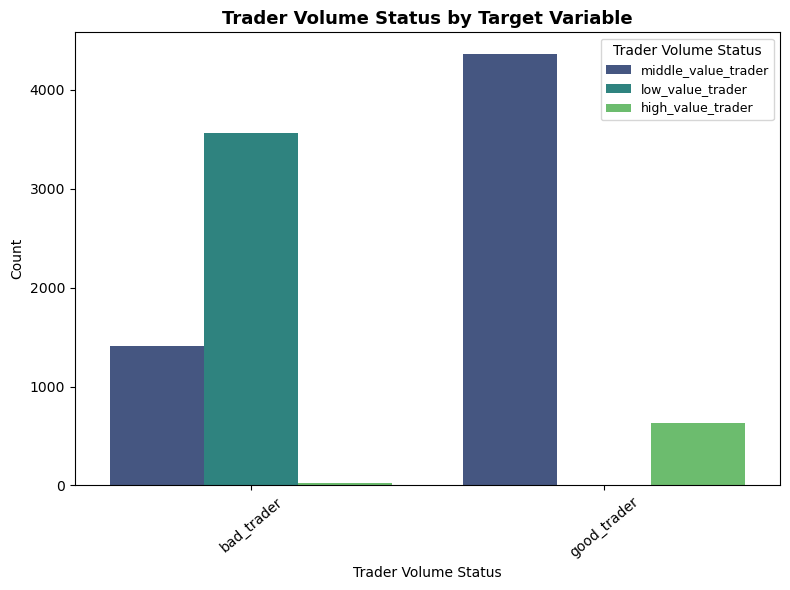

In [88]:
# Plot grouped bar chart
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_clean,
    x='target_variable',
    hue='trader_volume_status',
    palette='viridis'
)

# Customize look
plt.title('Trader Volume Status by Target Variable', fontsize=13, fontweight='bold')
plt.xlabel('Trader Volume Status')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.grid(False)
plt.legend(title='Trader Volume Status', title_fontsize=10, fontsize=9)
plt.tight_layout()
plt.show()

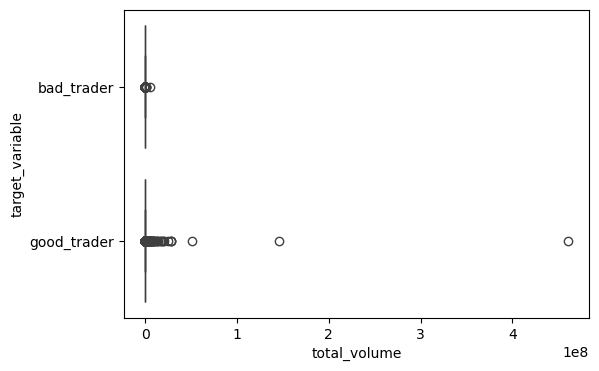

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='total_volume', y='target_variable')

plt.show()

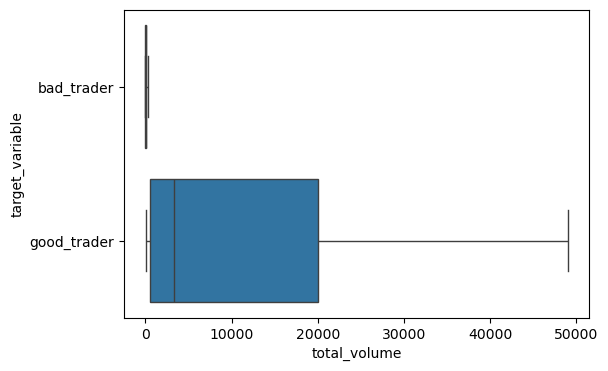

In [119]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='total_volume', y='target_variable', showfliers = None)

plt.show()

In [125]:
# Select numeric columns
num_cols = ['total_volume', 'tx_count_365d', 'active_weeks']

# Create a DataFrame to store outlier info
outlier_summary = pd.DataFrame(columns=['Feature', 'Outlier_Count', 'Outlier_%'])

# Loop through numeric columns and detect outliers
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    # Calculate percentage
    outlier_percent = (len(outliers) / len(df)) * 100

    # Append to summary
    outlier_summary = pd.concat([
        outlier_summary,
        pd.DataFrame({
            'Feature': [col],
            'Outlier_Count': [len(outliers)],
            'Outlier_%': [round(outlier_percent, 2)]
        })
    ], ignore_index=True)

outlier_summary

C:\Users\user\AppData\Local\Temp\ipykernel_7076\310302505.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([


,Feature,Outlier_Count,Outlier_%
0,total_volume,1728,17.28
1,tx_count_365d,1365,13.65
2,active_weeks,945,9.45


In [129]:
# Combine all outlier rows (union of all columns)
outlier_rows = pd.DataFrame()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    temp = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_rows = pd.concat([outlier_rows, temp])

# Drop duplicates (same wallet may be outlier in multiple columns)
outlier_rows = outlier_rows.drop_duplicates(subset='wallet').reset_index(drop=True)

print(f"Total unique outlier wallets: {len(outlier_rows)} ({(len(outlier_rows)/len(df))*100:.2f}%)")
outlier_rows.head()


Total unique outlier wallets: 2358 (23.58%)


,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,bad_trader,5.167238e+06,regular_user,high_value_trader,unserious,4,0xd2a54207f1ad576cd75b83c40adc91a4252f46ae
1,1,bad_trader,1.434579e+05,occasional_user,high_value_trader,unserious,1,0xc98a8f57c03f06183f5ea1e12590e6d95774372c
2,1,bad_trader,2.639524e+04,regular_user,middle_value_trader,unserious,2,0x061cf1e1a8ec30e58ce20b679ad63b30e1828780
3,1,bad_trader,5.758067e+04,regular_user,middle_value_trader,unserious,3,0x05a2a402f583f83734bfd7a38ffcd80e86c7ed0a
4,1,bad_trader,1.473098e+04,regular_user,middle_value_trader,unserious,8,0x72ef7efe492355a7012ce16aceae1935666e2dca


#### Interpretation

Around a **quarter of traders (23.6%)** exhibit extreme values in at least one feature.

Outliers are expected here, in **blockchain activity**, a small subset of wallets often drive the majority of volume and transactions (think **“whales” and “OGs”**).

So instead of dropping them outright, we need to decide whether they are **signal or noise**.

---

### 🧭 Options we Can Take Next

| **Strategy** | **When to Use** | **What It Does** |
|---------------|-----------------|------------------|
| **Keep all outliers** | If they represent real behavior (e.g., whale traders, high-volume users) | Keeps the model realistic and representative of real blockchain data |
| **Winsorize (Cap)** | If we want to limit influence of extremes without removing them | Caps all values above 99th percentile and below 1st percentile |
| **Remove outliers** | If they distort model training and aren’t our focus | Keeps the model focused on the majority user group |
| **Transform (Log)** | For skewed data (e.g., `total_volume`) | Compresses large differences while keeping relationships |

---


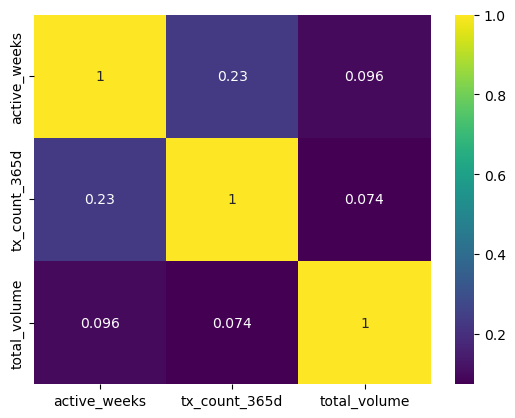

In [108]:
sns.heatmap(df[['active_weeks', 'tx_count_365d', 'total_volume']].corr(), annot=True, cmap='viridis')
plt.show()

#### Feature Importance

##### Mutual Information

In [159]:
# Select categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

In [145]:
from sklearn.metrics import mutual_info_score

In [149]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_clean.target_variable)

In [191]:
MI = df_clean[categorical_cols].apply(mutual_info_churn_score)
MI.sort_values(ascending = False)

wallet                            0.693147
target_variable                   0.693147
trader_volume_status              0.362135
trader_weekly_frequency_status    0.333756
trader_activity_status            0.283019
dtype: float64


**Interpretation**
- **`wallet` (MI ≈ 0.693)** — *Very high MI.*  
  The wallet identifier is almost perfectly predictive of the label in this dataset. That likely means many wallets have deterministic labels or repeated behaviors. **But this is dangerous for modeling**:
  - Using `wallet` directly will cause the model to *memorize* specific addresses (overfitting), yielding deceptively high performance on test data drawn from the same distribution.
  - `wallet` provides *no generalizable predictive power* for unseen wallets in production.
- **`trader_volume_status` (MI ≈ 0.362)** — *High information content.*  
  Volume categories (low / middle / high) carry meaningful signaling — they correlate well with target. This is an important categorical predictor.
- **`trader_weekly_frequency_status` (MI ≈ 0.334)** — *High information content.*  
  Weekly frequency buckets are also strongly informative and likely complementary to volume.
- **`trader_activity_status` (MI ≈ 0.283)** — *Moderate information content.*  
  Activity-level buckets add predictive signal, though slightly less than volume/frequency.


##### Correlation coefficient

In [170]:
# Select numerical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [180]:
# Create copy of df_clean as df
df = df_clean

# Convert target variable: good trader = 1, bad trader = 0
df['target_variable'] = df['target_variable'].map({
    'good_trader': 1,
    'bad_trader': 0
})

# Confirm conversion
df['target_variable'].value_counts()


target_variable
0    5000
1    5000
Name: count, dtype: int64

In [182]:
df_clean[numerical_cols].corrwith(df_clean['target_variable'])

active_weeks     0.489211
total_volume     0.026252
tx_count_365d    0.074965
dtype: float64


**Interpretation**
- **`active_weeks` (corr ≈ 0.489)** — *Moderate positive correlation.*  
  Traders who are active across more distinct weeks are substantially more likely to be labeled **good traders**. This suggests persistence/consistency is a strong behavioral signal: staying active over time correlates well with the "good" label.
- **`tx_count_365d` (corr ≈ 0.075)** — *Very weak positive correlation.*  
  Total transaction count over the year has only a small linear association with being a good trader. That indicates raw tx frequency alone is not a strong differentiator in its current form.
- **`total_volume` (corr ≈ 0.026)** — *Almost no linear correlation.*  
  Surprisingly, raw USD volume shows almost no linear relationship with the label. This can happen if volume is highly skewed (a few whales) or if the relationship with the label is non-linear (e.g., moderate volume → good, extremely high or extremely low → mixed).


#### OneHotEncoding

In [203]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns (excluding wallet & target)
categorical_cols = ['trader_activity_status', 'trader_volume_status', 'trader_weekly_frequency_status']

# Initialize encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded = ohe.fit_transform(df[categorical_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_cols))

from sklearn.utils import shuffle

# Shuffle the entire DataFrame
df = shuffle(df, random_state=42).reset_index(drop=True)

# Combine with numerical features and target
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df], axis=1)
y = df['target_variable']

# Check shape and head
print(X.shape)
X.head()


(10000, 12)


,active_weeks,total_volume,tx_count_365d,trader_activity_status_frequent_user,trader_activity_status_occasional_user,trader_activity_status_regular_user,trader_volume_status_high_value_trader,trader_volume_status_low_value_trader,trader_volume_status_middle_value_trader,trader_weekly_frequency_status_just_there,trader_weekly_frequency_status_og,trader_weekly_frequency_status_unserious
0,8,34876.863010,19,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4,57.337284,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4,3.352370,14,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,30.817263,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,561.349378,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [205]:
y

0       1
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    1
Name: target_variable, Length: 10000, dtype: int64

In [280]:
from sklearn.model_selection import train_test_split

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(8000, 12) (2000, 12)


In [282]:
print(y_train.shape, y_test.shape)

(8000,) (2000,)


#### Train logistic regression

In [212]:
# Import Logistic regression form Sklearn
from sklearn.linear_model import LogisticRegression

In [284]:
# Instantiate the model
model = LogisticRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [216]:
model.coef_

array([[ 3.28770941e-01,  1.08062889e-05, -1.31335845e-04,
        -1.98578352e-01, -2.54618014e-01, -2.75641758e-01,
        -3.60842378e-02, -3.75958246e-01, -3.16795639e-01,
        -1.24433608e-01, -2.85867560e-01, -3.18536955e-01]])

In [288]:
model.intercept_

array([-0.72961341])

In [290]:
y_pred = model.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.791


In [292]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1000
           1       0.87      0.69      0.77      1000

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



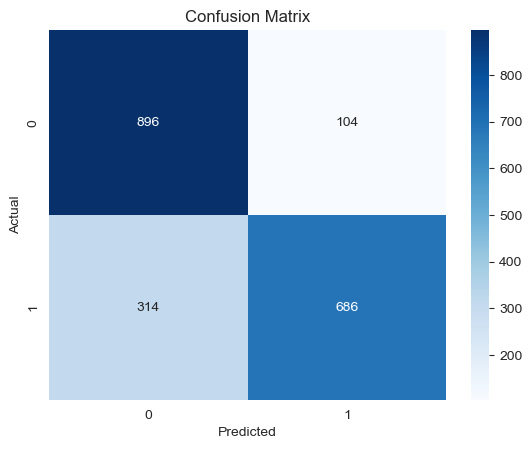

In [296]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC Score: 0.919


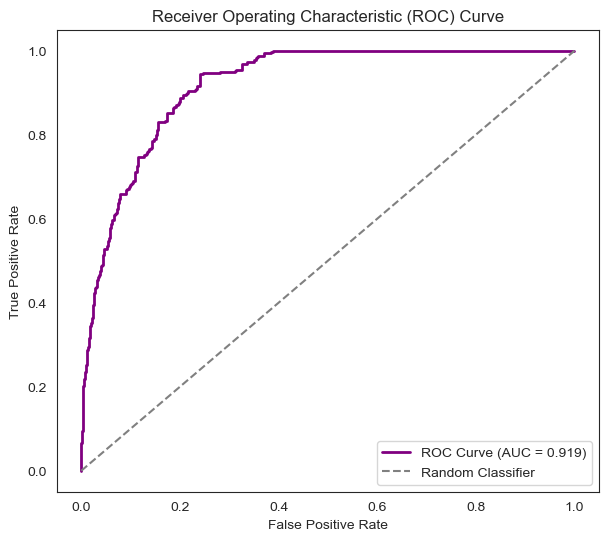

In [302]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class (good traders = 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='purple', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7076\1623509043.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


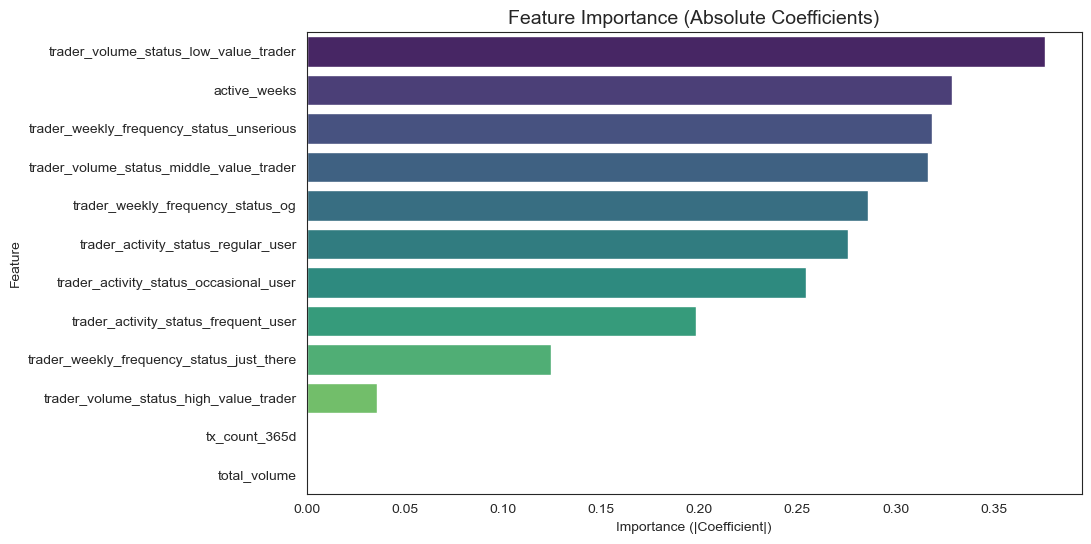

In [300]:
# Get feature names (numerical + encoded categorical)
feature_names = X.columns

# Get coefficients from the model
coefficients = model.coef_.flatten()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df, 
    palette='viridis'
)
plt.title('Feature Importance (Absolute Coefficients)', fontsize=14)
plt.xlabel('Importance (|Coefficient|)')
plt.ylabel('Feature')
plt.show()


### Model Evaluation Summary

| Metric | Bad Traders (0) | Good Traders (1) | Overall |
|:--|:--:|:--:|:--:|
| **Precision** | 0.74 | 0.87 | High precision for good traders – meaning the model rarely misclassifies bad traders as good (fewer false positives). |
| **Recall** | 0.90 | 0.69 | High recall for bad traders – fewer missed bad traders |
| **F1-Score** | 0.81 | 0.77 | Balanced trade-off between precision and recall |
| **Accuracy** | — | — | **0.79 (79%)** |
| **ROC-AUC** | — | — | **0.919 (Excellent)** |

---

#### Confusion Matrix Breakdown
- **True Positives (TP = 896):** Correctly predicted *good traders*.  
- **True Negatives (TN = 686):** Correctly identified *bad traders*.  
- **False Positives (FP = 104):** Predicted *good trader* but actually *bad*.  
- **False Negatives (FN = 314):** Predicted *bad trader* but actually *good*.


---

##### Interpretation of Results

- The **ROC-AUC score of 0.919** indicates excellent separation between good and bad traders.  
- **High precision (0.87)** for good traders means the model rarely mislabels a bad trader as good.  
- **Recall (0.69)** suggests some good traders are being missed, showing potential for optimization.  
- **Accuracy (79%)** confirms strong baseline reliability.

---

#### 💡 Feature Importance Insights

| Key Feature | Influence | Insight |
|:--|:--|:--|
| **Trader Volume Status (Low Value)** | 🔝 | Strongest predictor – users trading smaller but consistent amounts often perform better |
| **Active Weeks** | 🔝 | Consistency and long-term activity are key |
| **Weekly Frequency (Unserious / OG)** | 🔼 | Behavioral engagement matters more than total volume |
| **Total Volume** & **tx_count_365d** | 🔽 | Weaker predictors – large spikes in activity don’t always mean “good” performance |

`Note: ` Consistent trading patterns and engagement levels are stronger indicators of trader quality than raw transaction volume.

---

## 💼 Business Implications

1. **Retention Focus**  
   Encourage consistency. Reward users who trade regularly rather than only large-volume traders.

2. **User Segmentation**  
   Use predictions to classify new users as *high-potential* or *high-risk* and tailor engagement strategies.

3. **Campaign Targeting**  
   Focus marketing and education efforts on *frequent, mid-value traders* They’re most likely to evolve into good traders.

4. **Risk Control**  
   The model’s conservative approach (high recall for bad traders) can be leveraged to flag risky or suspicious behavior early.

---

# Conclusion

This logistic regression model achieves **strong predictive performance (AUC = 0.919)**, effectively distinguishing good from bad traders.  
Behavioral features, particularly **engagement frequency and consistency** emerge as the main drivers of trader quality, offering clear guidance for growth, retention, and risk strategies within blockchain trading ecosystems.
